# Lesson 18: Rossler and Lorenz systems of ODEs


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
%matplotlib inline

### Exercise 1. Rössler

```{image} ./taffy.png
:alt: Rossler taffy puller 
:width: 700px
:align: center
```

The Rössler system can describe the motion of a taffy puller[1] and is given by 

\begin{align*}
\frac{dx}{dt} &= -y - z \\
\frac{dy}{dt} &= x + ay \\
\frac{dz}{dt} &= b + z(x-c)
\end{align*}

- Solve this system numerically with $t \in [0,10]$ with $a=0.2, b=0.2, c = 5.7$ and initial conditions $x=0, y=-5, z=1$. 
- Plot your solution.
 - Note to plot your solution in 3D we need an extra bit of machinery from python and matplotlib. First import the Axes3D library with the line below.
 
```
from mpl_toolkits.mplot3d import Axes3D
```

 - Then to plot something make a figure with 3D axes and use the plot3D command. In the example below we have a solution called sol with $x(t),y(t),z(t)$ in the 0,1,2 columns respectively.
 
```
fig = plt.figure();
ax1 = fig.add_subplot(111, projection='3d');
ax1.plot3D(sol.y[0],sol.y[1],sol.y[2],'b');
ax1.set_xlabel('x');
ax1.set_ylabel('y');
ax1.set_zlabel('z');
```

[1] Rössler, O. (1983) The Chaotic Hierarchy. Zeitschrift für Naturforschung A, Vol. 38 (Issue 7), pp. 788-801. https://doi.org/10.1515/zna-1983-0714

In [5]:
def rosssys(t,vec):
    x,y,z = vec[0],vec[1],vec[2]
    a = 0.2
    b = 0.2
    c = 5.7
    dxdt = -y - z
    dydt = x + a*y
    dzdt = b + z*(x-c)
    return([dxdt,dydt,dzdt])

sol = solve_ivp(rosssys,[0,100],[0,-5,1],dense_output=True)




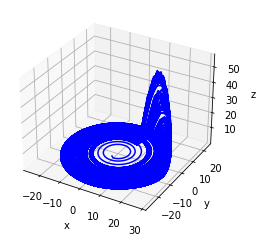

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure();
ax1 = fig.add_subplot(111, projection='3d');

ts = np.linspace(0,1000,10001)

ax1.plot3D(sol.sol(ts)[0],sol.sol(ts)[1],sol.sol(ts)[2],'b');
ax1.set_xlabel('x');
ax1.set_ylabel('y');
ax1.set_zlabel('z');


- Consider the Rössler system above but with $a=b=0.1$. Solve for $0 \leq t \leq 100$ and evaluate with a stepsize $h=0.01$ and the above initial conditions. Let $c = 12$ and simulate the system.
- Plot the solution in 3d, i.e. $x,y,z$, and also plot just $x$ versus $y$ in the plane. Note that there appears to be three bands that are `thicker.' 
- Plot just the last 5000 timesteps.
- Comment on your observations.

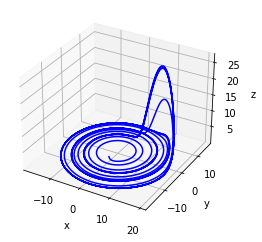

In [10]:
def rosssys(t,vec,a,b,c):
    x,y,z = vec[0],vec[1],vec[2]
    #a = 0.2
    #b = 0.2
    #c = 5.7
    dxdt = -y - z
    dydt = x + a*y
    dzdt = b + z*(x-c)
    return([dxdt,dydt,dzdt])

sol = solve_ivp(rosssys,[0,100],[0,-5,1],args=(0.1,0.1,12),dense_output=True)
#from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure();
ax1 = fig.add_subplot(111, projection='3d');

ts = np.linspace(0,100,10001)

ax1.plot3D(sol.sol(ts)[0],sol.sol(ts)[1],sol.sol(ts)[2],'b');
ax1.set_xlabel('x');
ax1.set_ylabel('y');
ax1.set_zlabel('z');

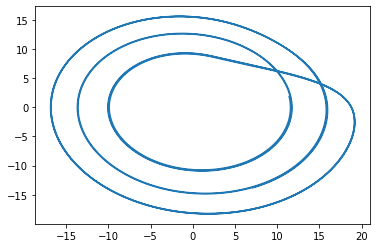

In [13]:
plt.plot(sol.sol(ts[5000:])[0],sol.sol(ts[5000:])[1]);

- Repeat the exercise of plotting of just the last 5000 timesteps but with $c=4,6,12,18$. 
- Comment on your observations.

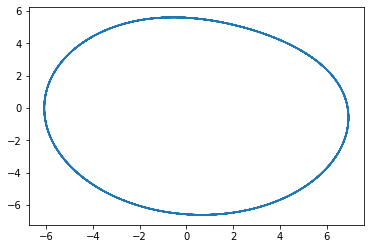

In [15]:
sol = solve_ivp(rosssys,[0,100],[0,-5,1],args=(0.1,0.1,4),dense_output=True)
ts = np.linspace(0,100,10001)
plt.plot(sol.sol(ts[5000:])[0],sol.sol(ts[5000:])[1]);

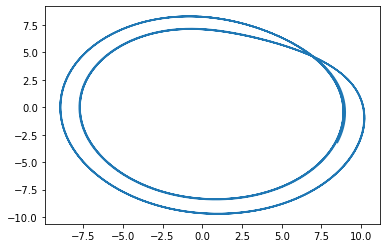

In [16]:
sol = solve_ivp(rosssys,[0,100],[0,-5,1],args=(0.1,0.1,6),dense_output=True)
ts = np.linspace(0,100,10001)
plt.plot(sol.sol(ts[5000:])[0],sol.sol(ts[5000:])[1]);

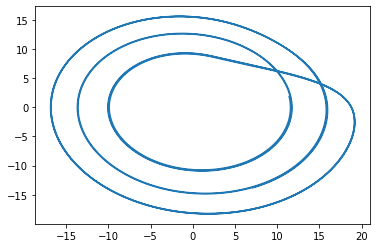

In [17]:
sol = solve_ivp(rosssys,[0,100],[0,-5,1],args=(0.1,0.1,12),dense_output=True)
ts = np.linspace(0,100,10001)
plt.plot(sol.sol(ts[5000:])[0],sol.sol(ts[5000:])[1]);

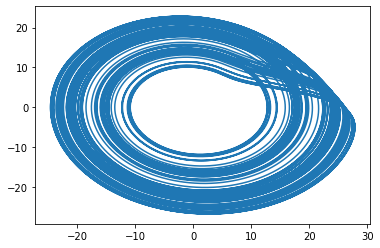

In [19]:
sol = solve_ivp(rosssys,[0,1000],[0,-5,1],args=(0.1,0.1,18),dense_output=True)
ts = np.linspace(0,1000,100001)
plt.plot(sol.sol(ts[50000:])[0],sol.sol(ts[50000:])[1]);

### Exercise 2.
In 1979 Rössler published about a similar system

\begin{align*}
\frac{dx}{dt} &= -y - z, \\
\frac{dy}{dt} &= x + 0.25y + w, \\
\frac{dz}{dt} &= 3 + xz, \\
\frac{dw}{dt} &= -0.5z + 0.05w,
\end{align*}

in his paper ``An equation for hyperchaos.''.[1] Approximate the solution to this system for $t \in [0,170]$ with initial conditions $x(0) = -20, y(0)=z(0)=0, w(0)=15$. Plot your result. We don't need to do more analysis with this system. There is a paper called hyperchaos. That's cool enough.

[1] Rössler OE. An equation for hyperchaos. Physics Letters A. 1979;71(2):155{157. Available
from: https://www.sciencedirect.com/science/article/pii/0375960179901506.


In [36]:
def hyperchaos(t,vec,a,b,c,d):
    x,y,z,w = vec[0],vec[1],vec[2],vec[3]
    dxdt=-y-z
    dydt = x + a*y+w
    dzdt = b + x*z
    dwdt = -c*z + d*w
    return([dxdt,dydt,dzdt,dwdt])
sol = solve_ivp(hyperchaos,[0,170],[-20,0,0,15],args=(0.25,3.,0.5,0.05),dense_output=True)



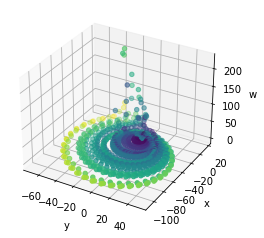

In [41]:
fig = plt.figure();
ax1 = fig.add_subplot(111, projection='3d');

ts = np.linspace(0,170,1001)

#note you need scatter and not plot3D to use color this way
ax1.scatter(sol.sol(ts)[1],sol.sol(ts)[0],sol.sol(ts)[2],c=sol.sol(ts)[3]); #plot x,y,z and use color to show w
ax1.set_xlabel('y');
ax1.set_ylabel('x');
ax1.set_zlabel('w');

### Exercise 3. Lorenz System of ODEs
The Lorenz system of differential equations originally arose in the context of modeling weather patterns. 

\begin{align*} \frac{dx}{dt} &= 10(y-x) \\  \frac{dy}{dt} &= x(28-z) -y  \\ \frac{dz}{dt} &= -\frac{8}{3} z + xy \end{align*}

- Find a numerical solution for the case where $x(0)=y(0)=z(0)=1$ for $0 \leq t \leq 20$ with $h=0.01$. Make a 3D figure showing the solution. 
- Repeat the task above with many different initial conditions and report your observations.
- Find the numerical solution to the IVPs with initial conditions below for $0 \leq t \leq 50$ with $h=0.01$. (This may take a bit.) Plot $z$ vs. $t$ for each IC on the same set of axes. Comment on any observations.
 - $x(0)=0.1, y(0)=0.1, z(0)=1$
 - $x(0)=0.1, y(0)=0.1, z(0)=1.01$

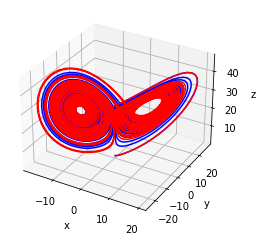

In [42]:
def lorenz(t,vec):
    x,y,z = vec[0],vec[1],vec[2]
    dxdt = 10*(y-x)
    dydt = x*(28-z)-y
    dzdt = -(8./3.)*z + x*y
    return([dxdt,dydt,dzdt])
sol = solve_ivp(lorenz,[0,50],[0.1,0.1,1],dense_output=True)
sol2 = solve_ivp(lorenz,[0,50],[0.1,0.1,1.01],dense_output=True)
ts = np.linspace(0,50,5001)

fig = plt.figure();
ax1 = fig.add_subplot(111, projection='3d');

ax1.plot3D(sol.sol(ts)[0],sol.sol(ts)[1],sol.sol(ts)[2],'b');
ax1.plot3D(sol2.sol(ts)[0],sol2.sol(ts)[1],sol2.sol(ts)[2],'r');

ax1.set_xlabel('x');
ax1.set_ylabel('y');
ax1.set_zlabel('z');
